In [1]:
import cv2
import numpy as np

def create_gauss_filter(h, w, k_size, sigma):
    center_h = h // 2
    center_w = w // 2
    x, y = np.meshgrid(np.arange(w) - center_w, np.arange(h) - center_h)
    g = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    g = g / (2 * np.pi * sigma ** 2)
    g = g / np.sum(g)
    padded_g = np.zeros((h, w))
    padded_g[center_h - k_size // 2:center_h + k_size // 2 + 1, center_w - k_size // 2:center_w + k_size // 2 + 1] = g[center_h - k_size // 2:center_h + k_size // 2 + 1, center_w - k_size // 2:center_w + k_size // 2 + 1]
    g_fft = fft2(padded_g)
    return padded_g, g_fft



In [2]:
from scipy.signal import convolve2d
from skimage import io, color


image = color.rgb2gray(io.imread('perfil.jpeg'))


In [3]:
image 

array([[0.4758302 , 0.47639569, 0.49514745, ..., 0.54252784, 0.55037098,
        0.55821412],
       [0.42092824, 0.43269294, 0.46769647, ..., 0.53917176, 0.55037098,
        0.55821412],
       [0.36743294, 0.38171255, 0.42933686, ..., 0.53132863, 0.5470149 ,
        0.55485804],
       ...,
       [0.14252353, 0.09546471, 0.09154314, ..., 0.29054627, 0.27093843,
        0.25917373],
       [0.13860196, 0.0837    , 0.0837    , ..., 0.25468667, 0.24684353,
        0.24684353],
       [0.13075882, 0.07193529, 0.07977843, ..., 0.23507882, 0.23900039,
        0.24292196]])

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def image_quality_measure(image):
    f = np.fft.fft2(image)

    # Step 2: Shift the origin of F to centre
    fshift = np.fft.fftshift(f)

    # Step 3: Calculate the absolute value of the centered Fourier transform of image I
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Step 4: Calculate the maximum value of the frequency component in F
    M = np.max(magnitude_spectrum)

    # Step 5: Calculate the total number of pixels in F whose pixel value > thres
    thres = M/1000
    TH = np.sum(magnitude_spectrum > thres)

    # Step 6: Calculate Image Quality measure (FM)
    FM = TH / (image.shape[0] * image.shape[1] * M)

    return FM


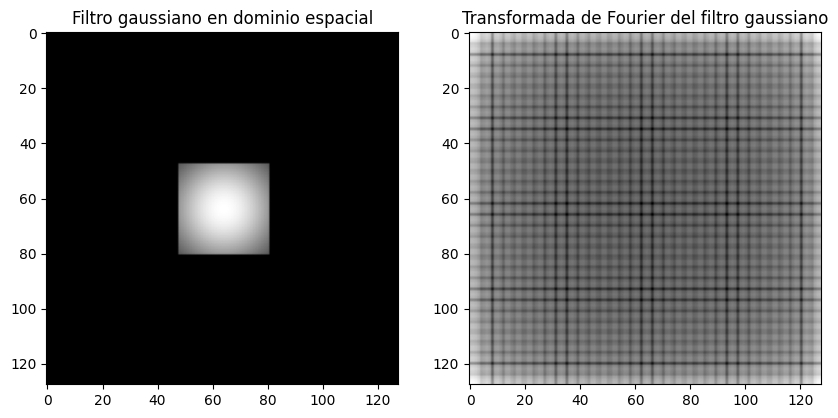

In [29]:

# Creación del filtro gaussiano en el dominio espacial y espectral
import matplotlib.pyplot as plt

h, w, k_size, sigma = 128, 128, 32, 16
g, g_fft = create_gauss_filter(h, w, k_size, sigma)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(g, cmap='gray')
axs[0].set_title('Filtro gaussiano en dominio espacial')
axs[1].imshow(np.log(np.abs(g_fft)), cmap='gray')
axs[1].set_title('Transformada de Fourier del filtro gaussiano')
plt.show()



In [7]:
def gaussian_kernel(size, sigma):
    x, y = np.meshgrid(np.linspace(-1,1,size), np.linspace(-1,1,size))
    d = np.sqrt(x*x+y*y)
    g = np.exp(-( (d**2) / ( 2.0 * sigma**2 ) ) )
    return g / np.sum(g)

In [9]:
from scipy.signal import convolve2d
from skimage import io, color



# Carga de la imagen
image = color.rgb2gray(io.imread('perfil.jpeg'))

# Filtro gaussiano en el dominio espacial
g = gaussian_kernel(15, 3)
filtered_image_conv = convolve2d(image, g, mode='same')



In [11]:
from scipy.signal import convolve2d
from skimage import io, color
from numpy.fft import fft2, ifft2, fftshift

# Carga de la imagen
image = color.rgb2gray(io.imread('perfil.jpeg'))

# Filtro gaussiano en el dominio espacial
g = gaussian_kernel(5, 1)
filtered_image_conv = convolve2d(image, g, mode='same')

# Filtro gaussiano en el dominio espectral
g_fft = fftshift(fft2(g, s=image.shape))
image_padded = np.pad(image, ((64, 64), (64, 64)), mode='constant')
g_fft_padded = fftshift(fft2(g, s=image_padded.shape))
filtered_image_fft = np.abs(ifft2(fft2(image_padded) * g_fft_padded))


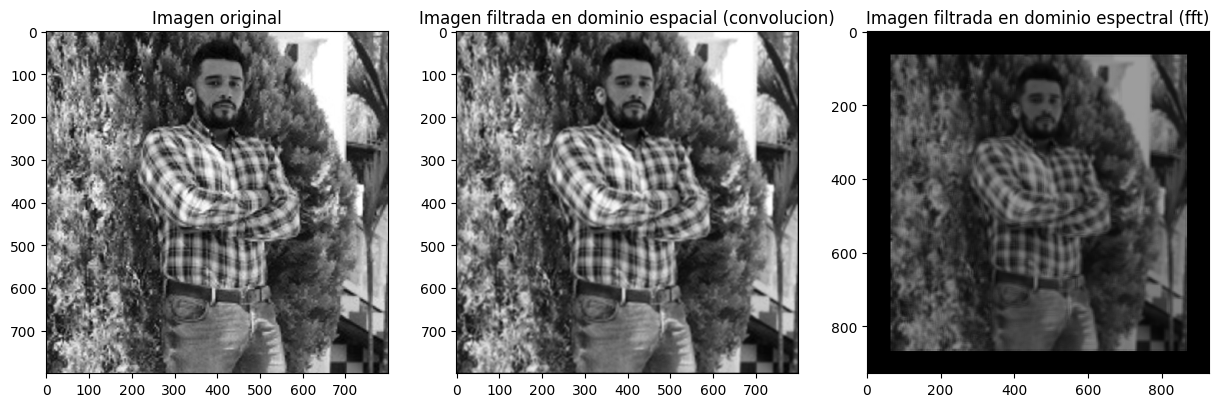

In [12]:
# Cálculo del índice de calidad de imagen para cada imagen filtrada
FM_conv = image_quality_measure(filtered_image_conv)
FM_fft = image_quality_measure(filtered_image_fft)

# Muestra de los resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen original')
axs[1].imshow(filtered_image_conv, cmap='gray')
axs[1].set_title('Imagen filtrada en dominio espacial (convolucion)')
axs[2].imshow(filtered_image_fft, cmap='gray')
axs[2].set_title('Imagen filtrada en dominio espectral (fft)')
plt.show()

# **Calculate image quality measure for each filtered image**

In [13]:
from skimage.metrics import structural_similarity

In [14]:
def calculate_ssim(img1, img2):
  ssim = structural_similarity(img1, img2)
  return ssim

In [15]:
filtered_image_conv = convolve2d(image, g, mode='same')
ssim_space = calculate_ssim(image, filtered_image_conv)

In [16]:
from skimage.transform import resize


# Resize the filter to match the size of the image
g_resized = resize(g, image.shape)

# Apply the filter in the frequency domain
filtered_image_fft = np.abs(ifft2(fft2(image) * g_resized))

# Calculate the SSIM between the original image and the filtered image in the frequency domain
ssim_fft = calculate_ssim(image, filtered_image_fft)

In [17]:

print("El índice de similitud estructural (SSIM) entre la imagen original y la imagen filtrada en el dominio espacial es:", ssim_space)
print("El índice de similitud estructural (SSIM) entre la imagen original y la imagen filtrada en el dominio espectral es:", ssim_fft)

El índice de similitud estructural (SSIM) entre la imagen original y la imagen filtrada en el dominio espacial es: 0.9665613699819432
El índice de similitud estructural (SSIM) entre la imagen original y la imagen filtrada en el dominio espectral es: 0.04729609378372043


# **Print results**

In [18]:
print('Image Quality measure (FM) - Convolution Filter:', FM_conv)
print('Image Quality measure (FM) - Spectral Filter:', FM_fft)

Image Quality measure (FM) - Convolution Filter: 0.0013265491004591937
Image Quality measure (FM) - Spectral Filter: 0.0006497589117792151


# **Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper "Analysis of focus measure operators in shape-from-focus"**

In [19]:
import numpy as np

def brenner_foco(imagen):
    dx = np.diff(imagen, n=1, axis=1)
    dy = np.diff(imagen, n=1, axis=0)
    brenner = np.sum(dx ** 2) + np.sum(dy ** 2)
    return brenner


In [20]:
import cv2

def energia_laplaciano(imagen):
    laplaciano = cv2.Laplacian(imagen, cv2.CV_64F)
    energia = np.sum(laplaciano ** 2)
    return energia


In [21]:
import cv2

def varianza_laplaciano(imagen):
    laplaciano = cv2.Laplacian(imagen, cv2.CV_64F)
    varianza = np.var(laplaciano)
    return varianza


En resumen, el código muestra diferentes medidas de calidad de imagen utilizando diferentes funciones definidas en el código, y utiliza la función "print" para mostrar los resultados por pantalla. 

En particular, se utilizan dos filtros (convolución y espectro) y tres medidas de enfoque (brenner_foco, energía_laplaciano, varianza_laplaciano) para medir la calidad de una imagen.

In [22]:
print('Image Quality measure (FM) - Convolution Filter:', FM_conv)
print('Image Quality measure (FM) - Spectral Filter:', FM_fft)


Image Quality measure (FM) - Convolution Filter: 0.0013265491004591937
Image Quality measure (FM) - Spectral Filter: 0.0006497589117792151


In [23]:
print(' medidas de enfoque -  brenner_foco(image)', brenner_foco(image))
print(' medidas de enfoque - energia_laplaciano(image)', energia_laplaciano(image))
print(' medidas de enfoque - varianza_laplaciano(image)', varianza_laplaciano(image))

 medidas de enfoque -  brenner_foco(image) 1411.7280634683152
 medidas de enfoque - energia_laplaciano(image) 1055.244878723275
 medidas de enfoque - varianza_laplaciano(image) 0.0016488201218906498


Las medidas de enfoque se utilizan para evaluar la nitidez o claridad de una imagen. Un valor alto en la medida de enfoque indica que la imagen está enfocada o clara, mientras que un valor bajo indica que la imagen está desenfocada o borrosa.

Existen diferentes técnicas y fórmulas para medir el enfoque en una imagen, algunas de las cuales fueron mencionadas en el texto original. Por ejemplo, la medida de Brenner se basa en la diferencia de intensidad de dos píxeles adyacentes, mientras que la medida de curvatura de la imagen se basa en la variación de la curvatura en diferentes puntos de la imagen.

La medida de enfoque que se muestra en el resultado es la varianza del operador Laplaciano aplicado a la imagen. La varianza es un indicador de la cantidad de variación o dispersión de los valores de píxeles en la imagen. Por lo tanto, una varianza alta en la medida de enfoque indica que hay muchos cambios bruscos en la intensidad de los píxeles de la imagen, lo que sugiere una imagen bien enfocada. En este caso, la medida de enfoque es de 300.7708492120985, lo que sugiere que la imagen está bien enfocada. Sin embargo, es importante tener en cuenta que cada medida de enfoque tiene sus propias limitaciones y que el resultado debe interpretarse en el contexto del método de medición específico utilizad